# Практическое задание по теме 1. Временные ряды

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
PATH = 'C:/Users/ASER/Desktop/GeekBrains/ML_in_business/Lesson_1/'

### 1. Выберите наборы данных,  которые можно интерпретировать, как временные ряды

* а) зависимость цены на недвижимость в конкретном регионе от времени - *временной ряд*.
* б) скорость полета самолета при перелете из аэропорта А в аэропорт В – *не является временным рядом*
* в) количество отказов компьютера – *это число, соответственно не является временным рядом. Чтобы говорить о временном ряде,  должно быть количество отказов компьютера в единицу времени – в неделю, за месяц и т.д.*
* г) число обращений в поликлинику по району – *число  не является временным рядом. Чтобы говорить о временном ряде,  должно число обращений в поликлинику по району в единицу времени – в день, неделю  и т.д.*
* д) координаты автобуса при движении по маршруту *– не связаны со временем, соответственно не является временным рядом.*
* е) координаты фигуры нарушителя в файле видеофиксации охранной системы *- являются временным рядом только если в файле есть связь со временем, например, координаты в какие-то фиксированные моменты времени.*

### 2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [3]:
file_name = 'DUQ_hourly.csv'

In [4]:
data = pd.read_csv(PATH + file_name, index_col=[0], parse_dates=[0])
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DUQ_MW  119068 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


Результат анализа типов показывает, что интервал изменения индексов начинается от 2005-12-31 01:00:00 и идет до 2018-01-02 00:00:00. Мы знаем из описания, что шаг измерений по времени составляет 1 час. Общий объем данных составляет 119068 значений, а тип измеряемой информации при записи был определен как float64.

Посмотрим сразу на характеристики нашего временного ряда в смысле основных статистик (используем pd.describe())

In [6]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


Или можем посмотреть на это с точки зрения графической модели основных статистик. Однако, необходимо помнить, что в случае временного ряда это не совсем корректное исследование, т.к. существование цикличности и тренда приводят к существенному изменению значений ряда во времени.

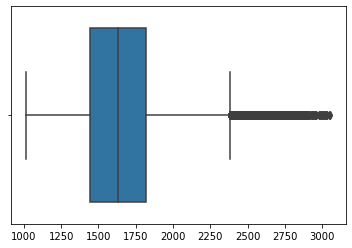

In [7]:
sns.boxplot(data.values)
plt.show()

Сделаем анализ пропусков как определение числа меток с отсутствующим (null) значением.

In [8]:
data['DUQ_MW'].isnull().sum()

0

Ряд на графике:

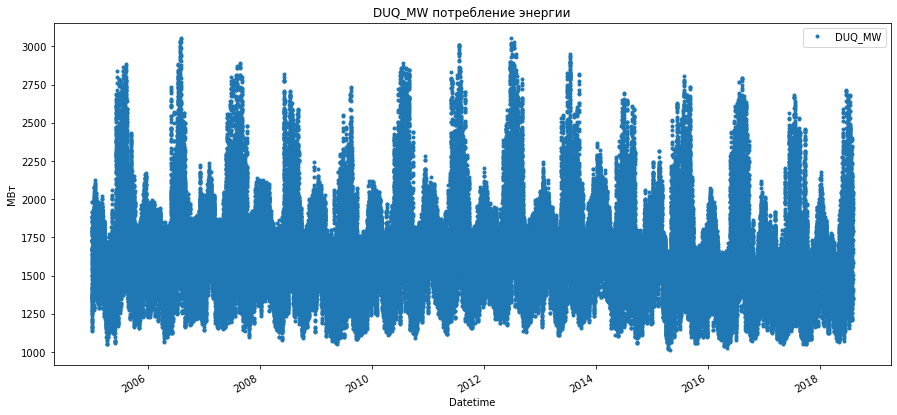

In [9]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ_MW потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

Рис.1 потребление энергии за весь период ряда

#### Результаты визуализации
* Основные статистики показали, что пропусков нет
* Визуальный анализ показывает что предъявленные данные имеют циклы. В 2015-2018гг уровень потребления электроэнергии немного снизился по сравнению с предыдущим периодом наблюдения.

### 3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [10]:
file_name = 'нефть-brent 2010-2019.xlsx'
brent_data = pd.read_excel(PATH + file_name, index_col=[0], parse_dates=[0])
brent_data = brent_data.sort_index()
brent_data.head()

,Значение
Дата,
2010-09-01,76.37
2010-09-02,76.89
2010-09-03,76.57
2010-09-04,76.62
2010-09-05,76.63


#### Пропуски данных

In [11]:
brent_weekly_mean = brent_data.resample('W').mean()
brent_weekly_mean.loc[brent_weekly_mean['Значение'].isnull(), :]

,Значение
Дата,
2011-10-16,NaN


In [12]:
brent_monthly_mean = brent_data.resample('M').mean()
brent_monthly_mean.head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


### 4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

In [13]:
brent_weekly_std = brent_data.resample('W').std()
brent_monthly_std = brent_data.resample('M').std()

brent_annual_mean = brent_data.resample('Y').mean()
brent_annual_std = brent_data.resample('Y').std()

#### Обработка пропусков

In [14]:
a = brent_weekly_mean.loc['2011-10-09', 'Значение'] 
b = brent_weekly_mean.loc['2011-10-23', 'Значение']
brent_weekly_mean.loc['2011-10-16', 'Значение'] = (a + b) / 2
brent_weekly_mean.loc['2011-10-09': '2011-10-23', :]

,Значение
Дата,
2011-10-09,103.476667
2011-10-16,106.616667
2011-10-23,109.756667


In [15]:
a = brent_weekly_std.loc['2011-10-09', 'Значение'] 
b = brent_weekly_std.loc['2011-10-23', 'Значение']
brent_weekly_std.loc['2011-10-16', 'Значение'] = (a + b) / 2
brent_weekly_std.loc['2011-10-09': '2011-10-23', :]

,Значение
Дата,
2011-10-09,2.030386
2011-10-16,1.111283
2011-10-23,0.192180


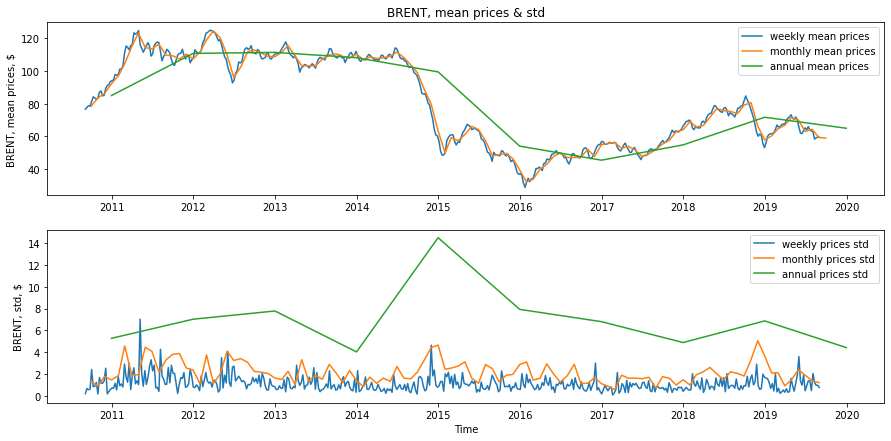

In [16]:
plt.figure(figsize=(15, 7))

plt.subplot(2, 1, 1)
plt.ylabel('BRENT, mean prices, $')
plt.plot(brent_weekly_mean.index, brent_weekly_mean, label='weekly mean prices' )
plt.plot(brent_monthly_mean.index, brent_monthly_mean, label='monthly mean prices')
plt.plot(brent_annual_mean.index, brent_annual_mean, label='annual mean prices')
plt.legend()

plt.title('BRENT, mean prices & std')

plt.subplot(2, 1, 2)
plt.ylabel('BRENT, std, $')
plt.plot(brent_weekly_std.index, brent_weekly_std, label='weekly prices std' )
plt.plot(brent_monthly_std.index, brent_monthly_std, label='monthly prices std')
plt.plot(brent_annual_std.index, brent_annual_std, label='annual prices std')
plt.legend()

plt.xlabel('Time')
plt.show()

### 5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовым.

* На недельных и месячных графиках видны краткосрочные изменеия цен, короткие циклы повышения/ понижения цен. На годовых графиках видны длинные циклы изменения цен. Например, в первом квартале 2015 года на недельных и месячных графиках виден отскок в движении цен на фоне общего понижательного годового тренда.
* Тренды изменения волотильности цен на нефть видны в годовых графиках волатильности, в то время как в месчных и недельных графиках они не так очевидны. 